In [35]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

In [7]:
X,y = make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,
                          n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=20)

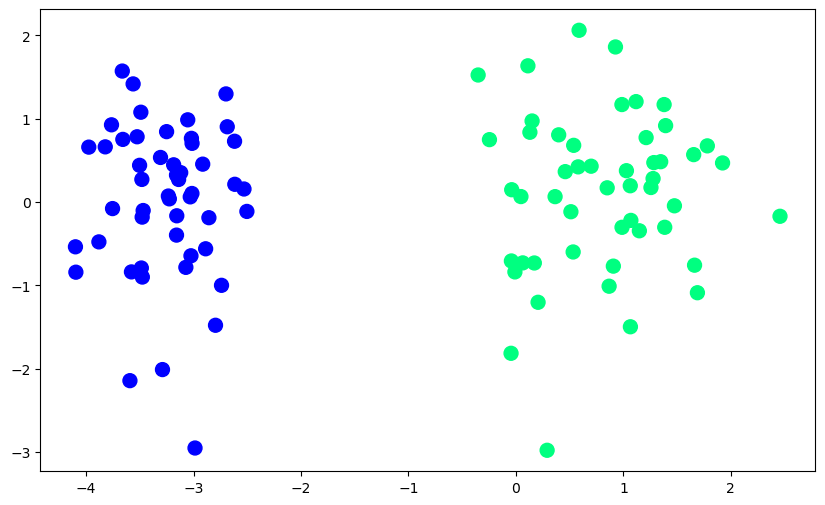

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.show()

In [27]:
from sklearn.linear_model import LogisticRegression

# sklearn logistic Regression class

C:\Users\aashi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aashi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


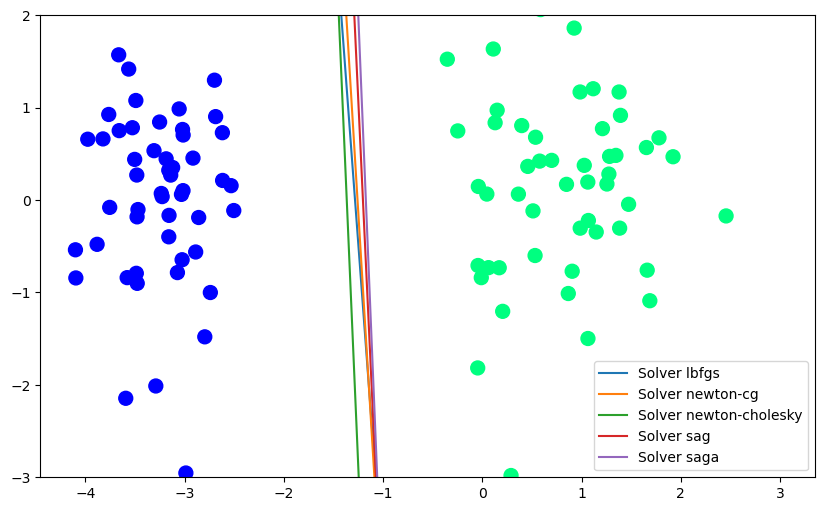

In [55]:
solvers = ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
for solver in solvers:
    log = LogisticRegression(penalty=None,solver=solver)
    log.fit(X,y)
    m = -(log.coef_[0][0]/log.coef_[0][1])
    c = -(log.intercept_/log.coef_[0][1])
    newX = np.linspace(-3,3,100)
    newY = m*newX + c
    plt.plot(newX,newY,label="Solver {}".format(solver))

plt.legend()
plt.ylim(-3,2)
plt.show()

# Batch Gradient Descent Logistic Regression

In [75]:
class logGD:
    def __init__(self,learning_rate,epochs=1000):
        self.lr = learning_rate
        self.W = None
        self.epochs=epochs

    def fit(self,X,y):
        X = np.insert(X,0,1,axis=1)
        self.W = np.ones(X.shape[1])
        for i in range(self.epochs):
            y_hat = sigmoid(np.dot(X,self.W))
            self.W = self.W + self.lr * np.dot((y-y_hat),X)/(X.shape[0])

        return self.W[1:],self.W[0]

In [85]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [124]:
gd = logGD(0.5,5000)
coef_,intercept_ = gd.fit(X,y)

In [126]:
coef_

array([4.83926872, 0.21182255])

In [128]:
m_gd = -(coef_[0]/coef_[1])
c_gd = -(intercept_/coef_[1])

C:\Users\aashi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


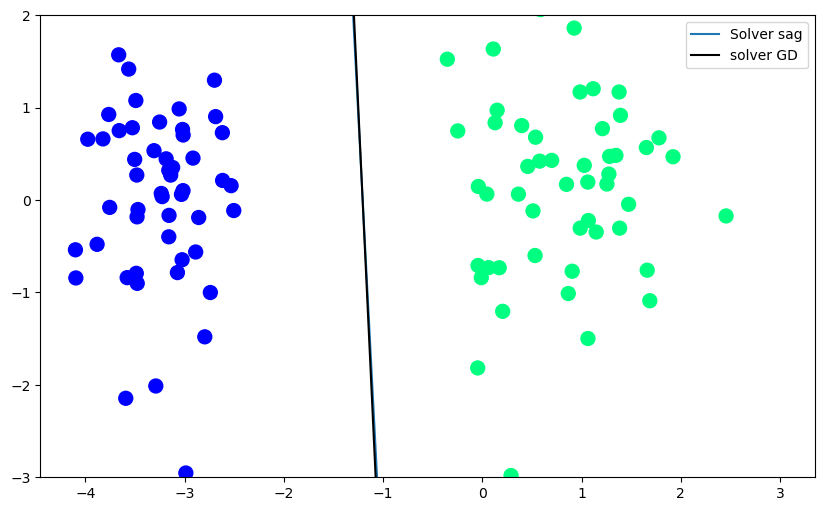

In [137]:
solvers = ['sag']
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
for solver in solvers:
    log = LogisticRegression(penalty=None,solver=solver)
    log.fit(X,y)
    m = -(log.coef_[0][0]/log.coef_[0][1])
    c = -(log.intercept_/log.coef_[0][1])
    newX = np.linspace(-3,3,100)
    newY = m*newX + c
    plt.plot(newX,newY,label="Solver {}".format(solver))

newX = np.linspace(-3,3,100)
newY = m_gd*newX + c_gd
plt.plot(newX,newY,label="solver GD",color='black')
plt.legend()
plt.ylim(-3,2)
plt.show()

# Stochastic Gradient Descent Logistic Regression

In [141]:
class logSGD:
    def __init__(self,learning_rate,epochs=1000):
        self.lr = learning_rate
        self.W = None
        self.epochs=epochs

    def fit(self,X,y):
        X = np.insert(X,0,1,axis=1)
        self.W = np.ones(X.shape[1])
        for i in range(self.epochs):
            for j in range(X.shape[0]):
                idx = np.random.randint(0,X.shape[0])
                y_hat = sigmoid(np.dot(X[idx],self.W))
                self.W = self.W + self.lr * np.dot(y[idx]-y_hat,X[idx])
        return self.W[1:],self.W[0]

In [179]:
sgd = logSGD(0.09,400)

In [181]:
scoef_,sintercept_ = sgd.fit(X,y)

In [182]:
m_sgd = -(scoef_[0]/scoef_[1])
c_sgd = -(sintercept_/scoef_[1])

C:\Users\aashi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


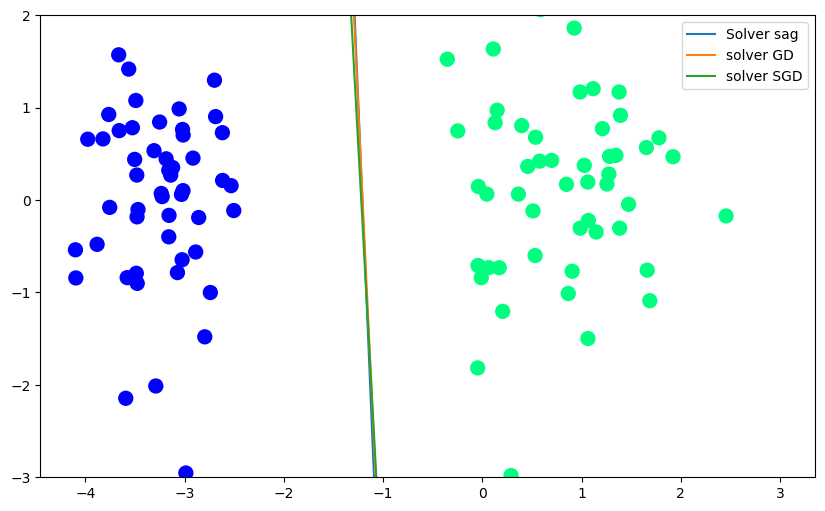

In [183]:
solvers = ['sag']
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
for solver in solvers:
    log = LogisticRegression(penalty=None,solver=solver)
    log.fit(X,y)
    m = -(log.coef_[0][0]/log.coef_[0][1])
    c = -(log.intercept_/log.coef_[0][1])
    newX = np.linspace(-3,3,100)
    newY = m*newX + c
    plt.plot(newX,newY,label="Solver {}".format(solver))

newX = np.linspace(-3,3,100)
newY = m_gd*newX + c_gd
plt.plot(newX,newY,label="solver GD")
newY = m_sgd*newX + c_sgd
plt.plot(newX,newY,label="solver SGD")
plt.legend()
plt.ylim(-3,2)
plt.show()